# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0383 Желнин Максим, Рудакова Юлия и Петровская Евгения. Вариант №17.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования.

## Основные теоретические положения

Спектр дискретного сигнала:

$$S(\omega)=\displaystyle\sum_{k}x_k e^{-i\omega k}$$

С помощью Спектра возможно анализировать амплитудно-частотную характеристику сигнала в частотной области. Для получения данной формулы используются дискретные преобразования Фурье. Этот метод обладает такими свойствами, как линейность, стационарность, симметрия и обратимость. Кроме того, можно использовать произведение сигналов для получения нового сигнала с помощью формулы $z(k)=x(k) \cdot y(k)$, откуда следует, что $Z(n)$ можно вычислить как $\frac{1}{N}\displaystyle\sum_{k}^{N-1} X(k)\cdot Y(n-k)$.

Дискретный фильтр - это система обработки дискретного сигнала, которая имеет свойства линейности и стационарности. Фильтры сглаживания широко используются для удаления скачкообразных изменений из сигнала. Ступенчатый сигнал содержит высокочастотные составляющие из-за множества резких, но небольших по амплитуде, перепадов уровня, которых нет в сглаженном сигнале.

#### Дискретное преобразование Фурье
Пусть ${x_t}$ периодическая последовательность отсчётов с периодом $N$, такая что $x_{t+N} = x_t$ при всех $t$

Дискретная функция:
$$s(k) = \sum_{t=-\infty}^{\infty} x_t \delta(k - tT)$$
будет иметь период NT, где T - период дискретизации.

$s(k)$ — периодическая функция, следовательно можно разложить её в ряд Фурье с коэффициентами:
$$X(n) = \sum_{t=0}^{N-1} x_t e^{-i\frac{2\pi n}{N}t}, n = 0,1,2,...,N-1$$
Обратной дискретное преобразование Фурье:
$$x_t = \frac{1}{N} \sum_{n=0}^{N-1} X(n) e^{i\frac{2\pi t}{N}n}, t=0,1,2,...,N-1$$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

**1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).**

Аналоговый сигнал:

$$s(t) = \displaystyle\sum_{k=0}^{10} A_k \cdot cos(\omega_kt+\varphi_k)$$

Из него фомируется дискретный сигнал


In [194]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [195]:
analog_total = 256
discrete_total = 31
analog_step = discrete_total / analog_total
analog_rate = analog_total // discrete_total
discrete_step = 1
max = 31
min = 0.
A = [random.randint(1, 11) for i in range(11)]
phi = [random.uniform(0, 0.5) for i in range(11)]
omega = [0.1 * np.pi * i for i in range(11)]
omega_pi = np.linspace(-np.pi, np.pi, discrete_total)
analog_x = np.arange(min, max, analog_step)
analog_y = np.array([min for i in range(analog_total)])

for i in range(11):
  analog_y += A[i]*np.cos(np.array(omega[i]*analog_x) + phi[i])

analog_y /= sum(A)

Далее была проведена дискретизация этого сигнала. Через равные промежутки выбираем 32 точки.

In [196]:
discrete_x = np.arange(min, max, discrete_step)
discrete_y = np.array([analog_y[i * analog_rate] for i in range(discrete_total)])

**2. Визуализировать исходные аналоговый и дискретизированный сигналы.**

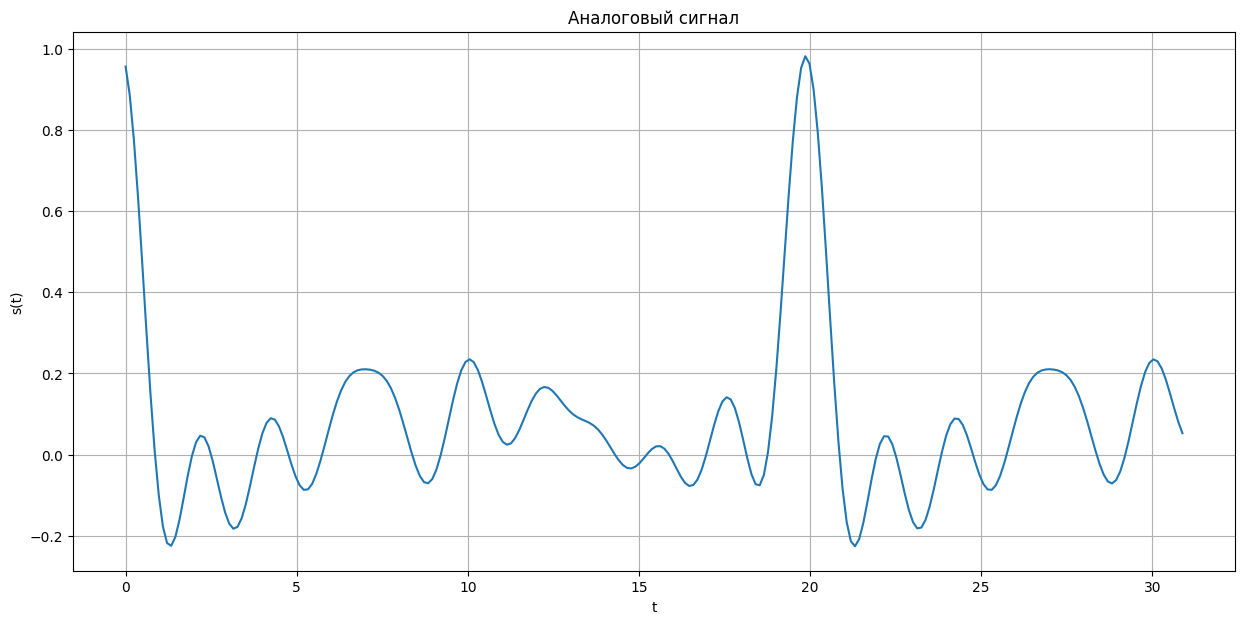

In [197]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Аналоговый сигнал")
plt.ylabel('s(t)')
plt.xlabel('t')
plt.plot(analog_x, analog_y)

<StemContainer object of 3 artists>

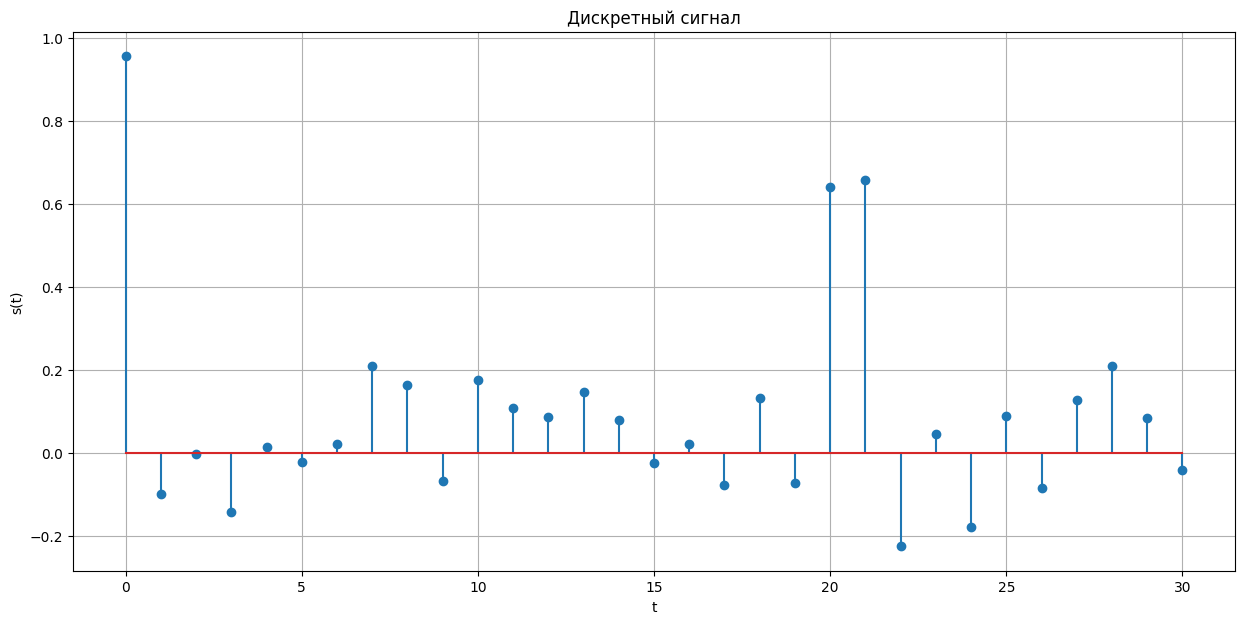

In [198]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Дискретный сигнал")
plt.ylabel('s(t)')
plt.xlabel('t')
plt.stem(discrete_x, discrete_y)

**3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.**

Спектр позволяет узнать, какие косинусоиды были использованы для формирования сигнала и с какой амплитудой. Кроме того, спектр является периодической функцией и симметричен относительно нулевой частоты.

In [199]:
def signal_spectr(omega, y, s = 0):
  for i in range(len(y)):
    s += y[i] * np.exp(-1j * omega * i)
  return s

<StemContainer object of 3 artists>

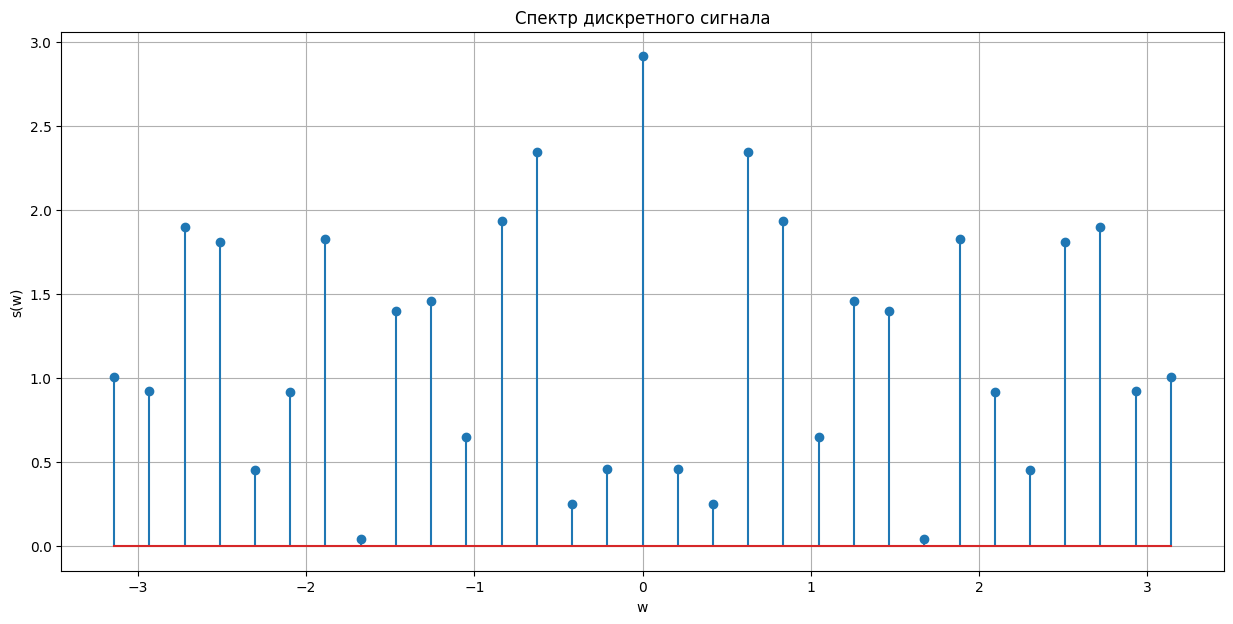

In [200]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Спектр дискретного сигнала")
plt.ylabel('s(w)')
plt.xlabel('w')
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_y)))

На графике видно, что спектр периодический и симметричен относительно 0.

**4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ - передаточной функции (частотной характеристики) фильтра.**

Сглаживание по 5-ти точкам:

$$y_n = \frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$$

Передаточная функция:

$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)}{5}$$

Сглаживание по 9-ти точкам:

$$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$$

Передаточная функция:

$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega)}{9}$$

Для областей, где это возможно, применим полученный формулы сглаживания, а для тех, где невозможно, сделаем апроксимацию.

In [201]:
smooth = lambda lambd, diff: np.array([lambd(i, discrete_y) if diff <= i < discrete_total - diff else 0 for i in range(discrete_total)])

coef_linear_5 = lambda i, y: statistics.mean(y[i-2 : i+3])
coef_linear_9 = lambda i, y: statistics.mean(y[i-4 : i+5])

smooth_y_5 = smooth(coef_linear_5, 2)
smooth_y_9 = smooth(coef_linear_9, 4)

discrete_convolve_5 = np.convolve(discrete_y, np.ones(5), 'same') / 5
discrete_convolve_9 = np.convolve(discrete_y, np.ones(9), 'same') / 9

**5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.**

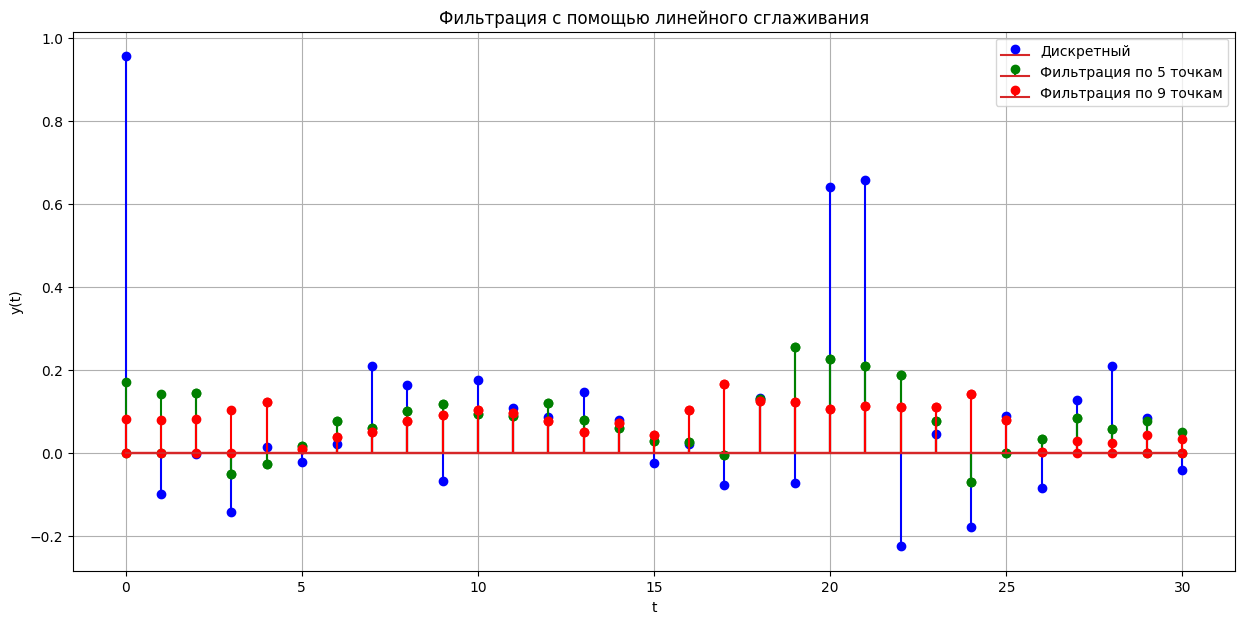

In [202]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Фильтрация с помощью линейного сглаживания")
plt.ylabel('y(t)')
plt.xlabel('t')
plt.stem(discrete_x, discrete_y, label="Дискретный", linefmt="blue")
plt.stem(discrete_x, discrete_convolve_5, label="Фильтрация по 5 точкам", linefmt="green")
plt.stem(discrete_x, smooth_y_5, linefmt="green")
plt.stem(discrete_x, discrete_convolve_9, label="Фильтрация по 9 точкам", linefmt="red")
plt.stem(discrete_x, smooth_y_9, linefmt="red")
plt.legend()

**6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.**

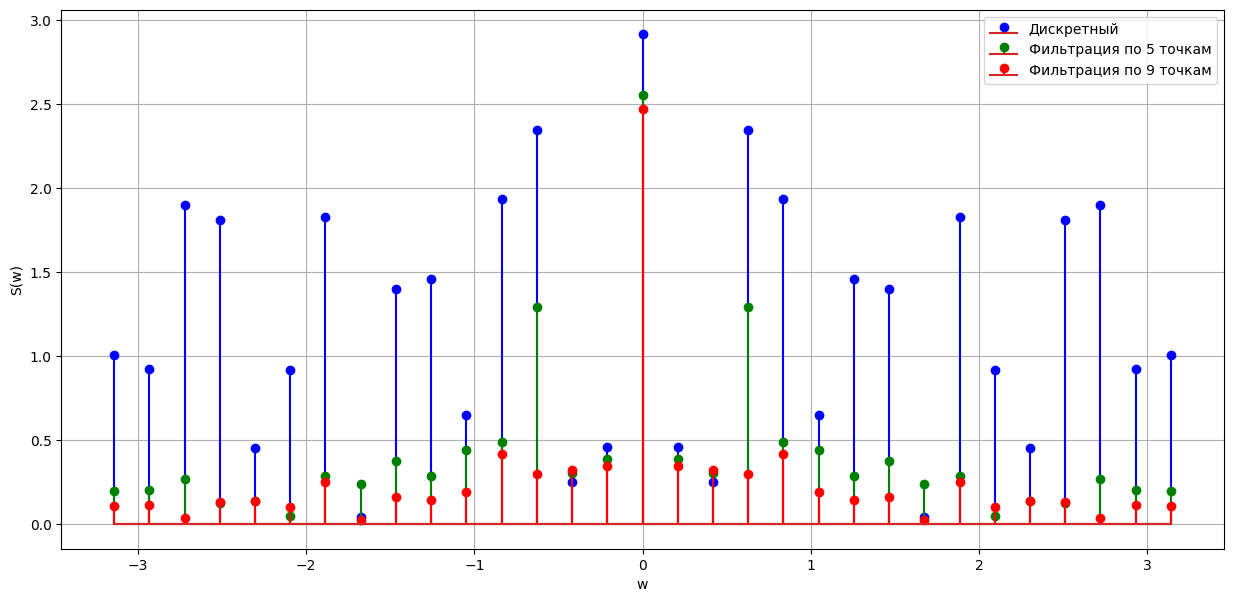

In [203]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.ylabel('S(w)')
plt.xlabel('w')
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_y)), linefmt="blue", label="Дискретный")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_convolve_5)), linefmt="green", label="Фильтрация по 5 точкам")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_convolve_9)), linefmt="red", label="Фильтрация по 9 точкам")
plt.legend()

**7. Проанализировать результат на соответствие значениям $H(ω)$. Сделать выводы.**

По графику спектра видно, что чем дальше частотная область от нуля, тем сильнее уменьшенее амплитуды, близко к 0 уменьшенее минимальное. По большей части с увеличением числа точек полоса пропускания становится меньше.

**8.a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.**

4.

$$y_n = \frac{s_{n+1}-s_{n-1}}{2h}$$

Передаточная функция:

$$H(\omega) = \frac{e^{i\omega}-e^{-i\omega}}{2}$$


In [204]:
coef_diff_1 = lambda i, y: (y[i+1] - y[i-1])/2

smooth_y_diff_1 = smooth(coef_diff_1, 1)

discrete_convolve_diff_1 = np.convolve(discrete_y, np.array([1, 0, -1]), 'same') / 2

5.

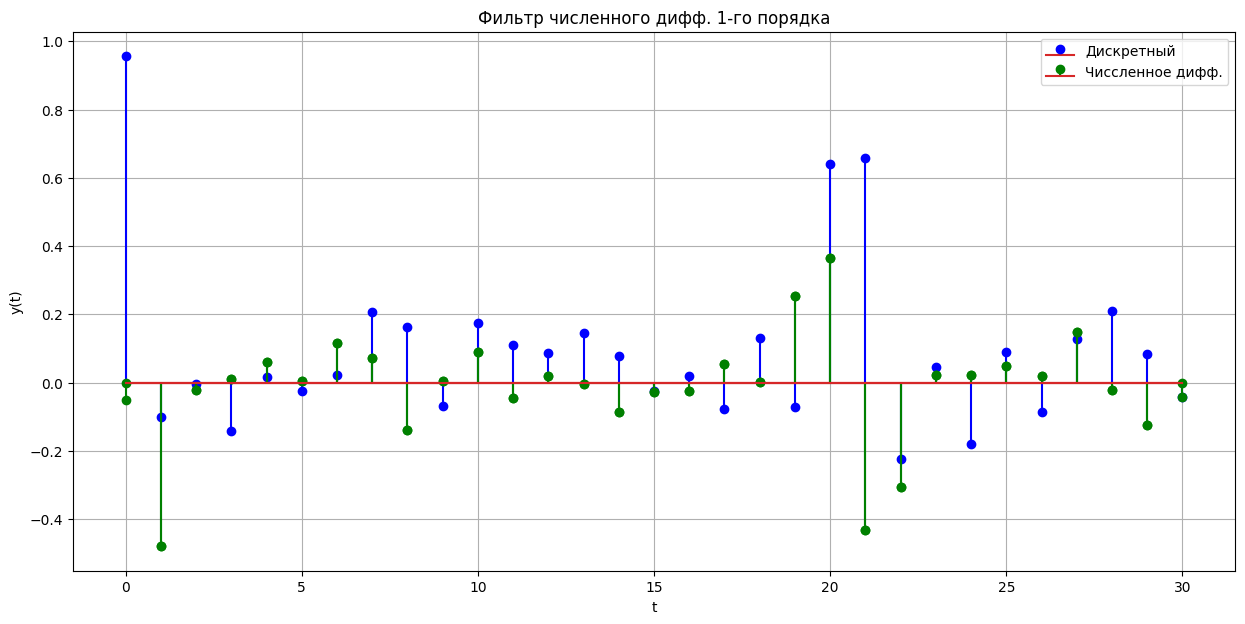

In [205]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Фильтр численного дифф. 1-го порядка")
plt.ylabel('y(t)')
plt.xlabel('t')
plt.stem(discrete_x, discrete_y, linefmt="blue", label="Дискретный")
plt.stem(discrete_x, discrete_convolve_diff_1, linefmt="green", label="Чиссленное дифф.")
plt.stem(discrete_x, smooth_y_diff_1, linefmt="green")
plt.legend()

6.

Было использовано преобразование из п.3.

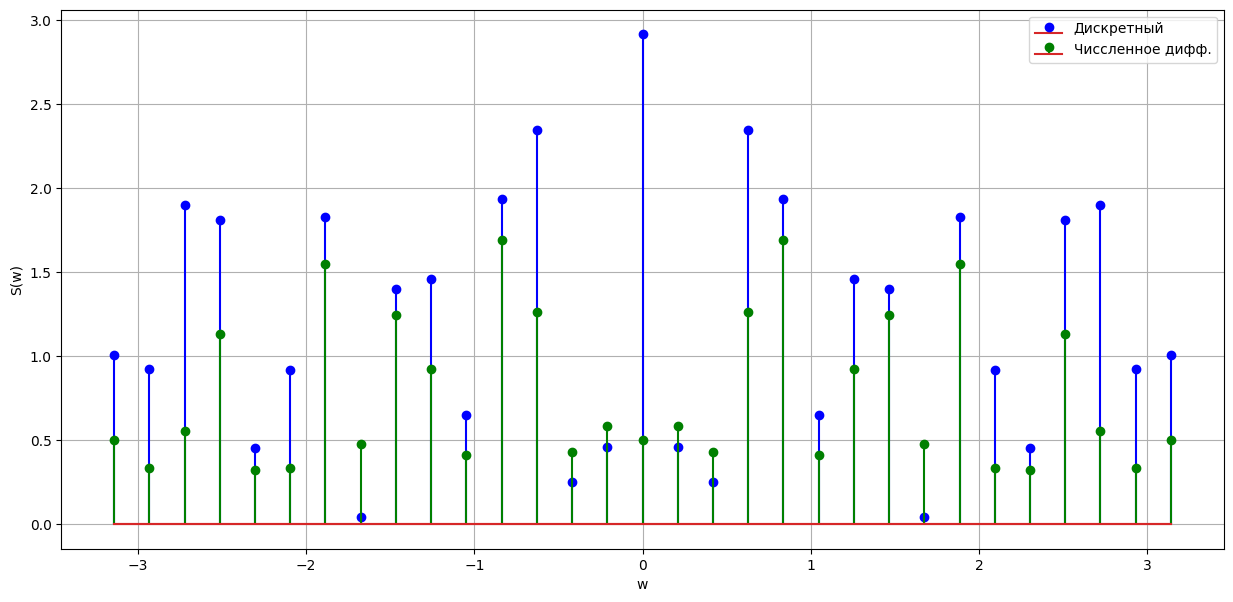

In [206]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.ylabel('S(w)')
plt.xlabel('w')
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_y)), linefmt="blue", label="Дискретный")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_convolve_diff_1)), linefmt="green", label="Чиссленное дифф.")
plt.legend()

7.

На средние частоты оказывается слабое влияния, однако на высоких и низких, сильно выделяющихся среди соседних,оказывается сильное подавление.

**8.b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона)**

4.

Прямоугольник:

$$y_{n+1} = y_n + s_{n+\frac{1}{2}}$$

Передаточная функция:

$$H(\omega)=\frac{1}{2i\cdot sin(\frac{\omega}{2})}$$

Формула трапеций:

$$y_{n+1} = y_n + \frac{s_n+s_{n+1}}{2}$$

Передаточная функция:

$$H(\omega)=\frac{cos\big( \frac{\omega}{2} \big)}{2i\cdot sin\big( \frac{\omega}{2} \big)}$$

Формула Симпсона:

$$y_{n+1} = y_{n-1}+\frac{s_{n-1}+4s_n+s_{n+1}}{3}$$

Передаточная функция:

$$H(\omega)=\frac{cos(\omega)+2}{3i\cdot sin(\omega)}$$

In [207]:
rectangle = lambda prev, y, i: prev + y[i]
trapeze = lambda prev, y, i: prev + (y[i-1] + y[i]) / 2
simpson = lambda preprev, y, i: preprev + (y[i - 2] + 4*y[i-1] + y[i]) / 3

def numerical_integration(y, method, start):
  result = np.zeros(len(y))
  for i in range(start, len(y)):
    result[i] = method(result[i-start], y, i)
  return result

5.

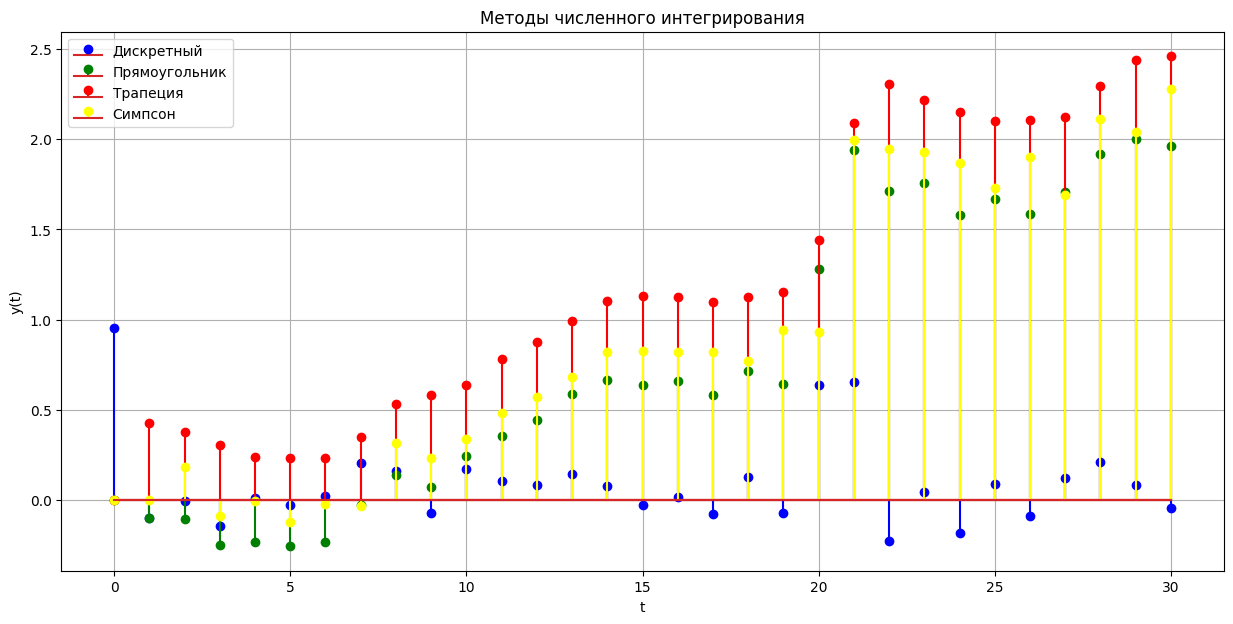

In [208]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Методы численного интегрирования")
plt.ylabel('y(t)')
plt.xlabel('t')
plt.stem(discrete_x, discrete_y, linefmt="blue", label="Дискретный")
plt.stem(discrete_x, numerical_integration(discrete_y, rectangle, 1), linefmt="green", label="Прямоугольник")
plt.stem(discrete_x, numerical_integration(discrete_y, trapeze, 1), linefmt="red", label="Трапеция")
plt.stem(discrete_x, numerical_integration(discrete_y, simpson, 2), linefmt="yellow", label="Симпсон")
plt.legend()

6.

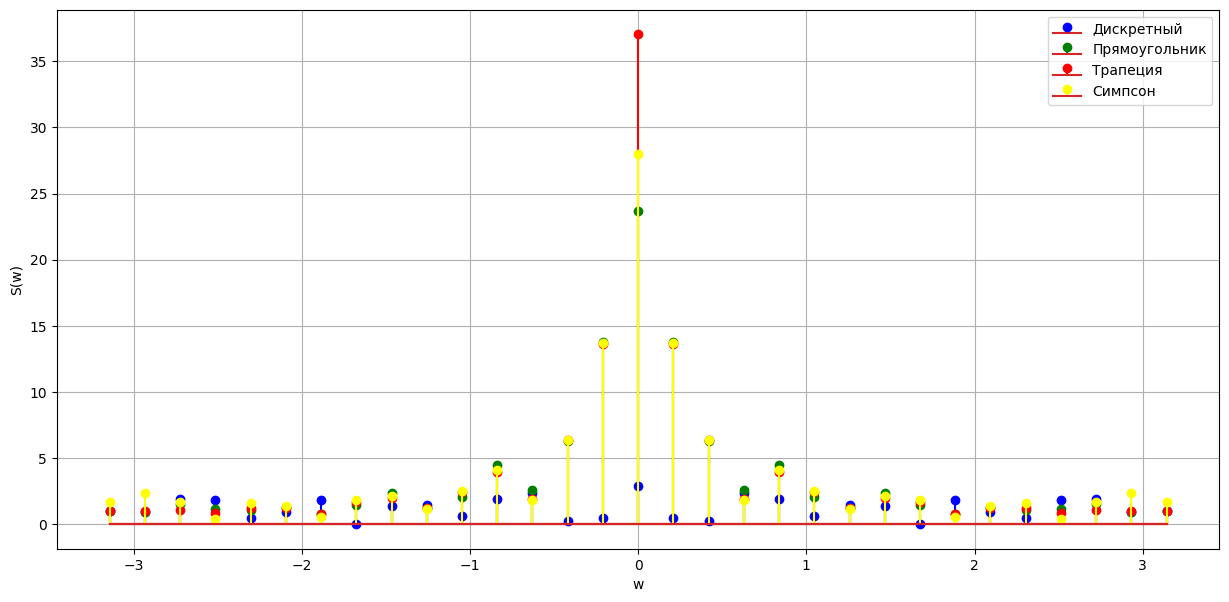

In [209]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.ylabel('S(w)')
plt.xlabel('w')
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_y)), linefmt="blue", label="Дискретный")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, numerical_integration(discrete_y, rectangle, 1))), linefmt="green", label="Прямоугольник")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, numerical_integration(discrete_y, trapeze, 1))), linefmt="red", label="Трапеция")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, numerical_integration(discrete_y, simpson, 2))), linefmt="yellow", label="Симпсон")
plt.legend()

*8.b.7. Анализ результатов.*

По графикам дискретных отсчетов спектра фильтров численного интегрирования можно заметить, что происходит усиление сигнала с увеличением частоты, в то время как низкие частоты подавляются. Формула Симпсона больше остальных усиливает сигнал на высоких частотах.

## Выводы

В рамках эксперимента был создан аналоговый сигнал, состоящий из нескольких косинусоид, и затем он был преобразован в дискретный вид. После этого был проанализирован спектр сигнала, полученный с помощью дискретного преобразования Фурье. К дискретизированному сигналу были применены фильтры, представляющие собой сглаживание, численное дифференцирование 1-го порядка и численное интегрирование (формула прямоугольников, формула трапеций, формула Симпсона). В результате анализа спектров, были получены следующие заключения:

- Фильтр на основе численного дифференцирования 1-го порядка затушевает сигнал в его частотной области.
- Дискретные фильтры, являющиеся численным интегрированием, увеличивают амплитуды сигналов.
- Влияние дискретных фильтров разнится в зависимости от частот
- Формула прямоугольников и формула Симпсона усиливают сигнал на всей области
- Формула трапеций наиболее эффективно увеличивает амплитуды на низких частотах